In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! git clone https://github.com/amoula11/ParkinsonsAIDetector-using-Deep-Learning-and-Machine-Learning-Models-.git

Cloning into 'ParkinsonsAIDetector-using-Deep-Learning-and-Machine-Learning-Models-'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 22.36 KiB | 2.79 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/parkinsons.csv")

In [5]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
df.shape

(195, 24)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. remove noisy/less important features based on features importance: "MDVP:APQ",'Shimmer:DDA', "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "HNR",
# 2. remove noisy/less important features based on outliers analysis: 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'
# => Neutral network 94 -> 97
# => CNN -> 100%
noizy_features = ["MDVP:APQ",'Shimmer:DDA', "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "HNR", ]
features = df.drop(['name', 'status']+noizy_features, axis=1) # Dropping the 'name' column as it's not relevant for prediction
target = df['status'] #'status' is the target variable you want to predict

# Splitting the dataset (into training and test sets)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target,  random_state=42) # Splits data into training (80%) and testing (20%) sets.

#train_test_split(...): Splits the data into training and testing sets.
# test_size=0.2 means 20% for the test set, 80% for training.
# stratify=target ensures that the split maintains the same proportion of class labels in both sets.
# random_state=42 sets a seed for reproducibility.

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# StandardScaler(): Creates a scaler object to standardize features.
# scaler.fit_transform(X_train): Fits the scaler to the training data and transforms it.
# scaler.transform(X_test): Transforms the testing data using the scaler fitted on the training data.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

accuracy*100
#score sans optimisation = 92.3

92.3076923076923

In [30]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

accuracy_svm*100
#score sans optimisation = 92.3
# score avec optimisation =94.8


94.87179487179486

In [33]:
from sklearn.neural_network import MLPClassifier

# Initialize the Multi-Layer Perceptron (Neural Network) model
mlp_model = MLPClassifier(random_state=42, max_iter=1000)

# Train the model
mlp_model.fit(X_train_scaled, y_train)

# MLPClassifier(...): Creates a neural network classifier with a random seed for reproducibility and a maximum of 1000 iterations.
# mlp_model.fit(...): Trains the model on the scaled training data.


# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)

accuracy_mlp*100
# score sans optimisation = 94.8
# score avec optimisation = 97.4

97.43589743589743

In [35]:

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np

# Reshaping the data for CNN
# CNN expects data in the shape (number of samples, number of features, 1)
X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

# Defining the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test_cnn, y_test))

# Evaluate the model
cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)[1]
cnn_accuracy*100
#score sans optimsation = 94.8
# score avec optimisation 100

100.0

In [39]:

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import numpy as np

# Reshaping the data for RNN
# RNN expects data in the shape (number of samples, number of timesteps, number of features per timestep)
# Here, we treat each feature as a timestep
X_train_rnn = np.expand_dims(X_train_scaled, axis=1)
X_test_rnn = np.expand_dims(X_test_scaled, axis=1)

# Defining the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = rnn_model.fit(X_train_rnn, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test_rnn, y_test))

# Evaluate the model
rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)[1]
rnn_accuracy*100
# score sans optimisation = 89.7
# score avec optimisation =92.3

92.30769276618958

In [41]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Reshaping the data for LSTM
# LSTM expects data in the shape (number of samples, number of timesteps, number of features per timestep)
# Here, we treat each feature as a timestep
X_train_lstm = np.expand_dims(X_train_scaled, axis=1)
X_test_lstm = np.expand_dims(X_test_scaled, axis=1)

# Defining the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test_lstm, y_test))

# Evaluate the model
lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)[1]
lstm_accuracy*100
# score sans optimisation = 92.3
# score avec optimisation = 94.8

94.87179517745972

In [42]:
import numpy as np

# Get the learned coefficients (weights) connecting input features to the first hidden layer
input_layer_weights = mlp_model.coefs_[0]

# Calculate the absolute sum of weights for each feature across all neurons in the first hidden layer
feature_importance = np.abs(input_layer_weights).sum(axis=1)

# Get feature names from the original dataframe
feature_names = features.columns

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the features based on their importance scores
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the sorted features along with their importance scores
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: DFA, Importance: 27.716635845272283
Feature: MDVP:RAP, Importance: 23.575378166463192
Feature: MDVP:Fo(Hz), Importance: 23.380260905189896
Feature: spread2, Importance: 22.299343120345682
Feature: MDVP:Fhi(Hz), Importance: 21.848782376405172
Feature: Jitter:DDP, Importance: 21.662045681397256
Feature: D2, Importance: 21.604269991268218
Feature: MDVP:Jitter(Abs), Importance: 21.120102396827594
Feature: RPDE, Importance: 20.061605374916045
Feature: MDVP:PPQ, Importance: 19.358995422896935
Feature: MDVP:Flo(Hz), Importance: 19.147047322007655
Feature: MDVP:Jitter(%), Importance: 18.022636992900154
Feature: spread1, Importance: 17.205994416768043
Feature: Shimmer:APQ5, Importance: 15.761261009878401
Feature: NHR, Importance: 15.409852257947525
Feature: PPE, Importance: 15.157067458332858


In [43]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importances
result = permutation_importance(mlp_model, X_test_scaled, y_test, scoring='accuracy')
feature_importances = result.importances_mean

# Get the names of the features from your 'features' DataFrame
feature_names = features.columns

# Sort importances with their corresponding feature names
sorted_importances = sorted(zip(feature_importances, feature_names), reverse=True)

# Print the top features
for importance, name in sorted_importances:  # Print top 5
    print(name, importance * 100)

spread2 14.358974358974358
spread1 11.794871794871794
PPE 5.641025641025639
MDVP:Jitter(Abs) 5.641025641025639
MDVP:Fo(Hz) 5.128205128205125
MDVP:PPQ 3.589743589743588
MDVP:Fhi(Hz) 3.076923076923077
RPDE 3.076923076923075
DFA 3.076923076923075
D2 2.051282051282053
MDVP:RAP 1.5384615384615397
MDVP:Flo(Hz) 1.0256410256410264
Jitter:DDP 1.0256410256410264
MDVP:Jitter(%) 1.0256410256410242
Shimmer:APQ5 -1.0256410256410264
NHR -1.0256410256410264


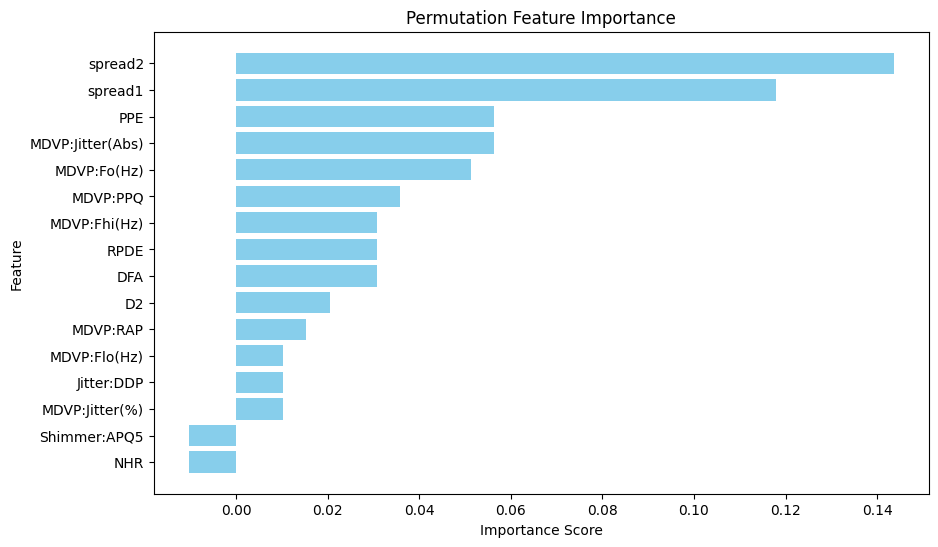

In [44]:
import matplotlib.pyplot as plt

# Extract feature names and importance scores
features_importance_sorted = sorted_importances

# Separate feature names and importance scores
feature_names_sorted = [pair[1] for pair in features_importance_sorted]
importance_scores_sorted = [pair[0] for pair in features_importance_sorted]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names_sorted, importance_scores_sorted, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()